<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos</p>
<p style="margin: 0; text-align:right;">2022-11 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Práctica 1- Tipología y ciclo de vida de los datos



## Autores

- David Fernández Álvarez

- Sara Robisco Cavite


## 1. Contexto

El contexto de esta práctica es la obtención de las detecciones de ondas gravitacionales por parte de LIGO, VIRGO y KAGRA, tanto aquellas confirmadas y publicadas como las descartadas.

Para ello obtendremos los datos de la web del consorcio LIGO, VIRGO y KAGRA. En esta web no sólo exponen información sobre los diferentes observatorios y sus actividades, sino que además muestran y comparten sus datos de manera pública. El enlace es https://www.gw-openscience.org/ 

Hemos escogido esta web porque nos ha parecido un conjunto de datos original dentro de una web lo suficientemente compleja para la elaboración de la práctica.

## 2. Título del dataset

Hemos decidido denominar al dataset detecciones_ondas_gravitacionales.csv

## 3. Descripción del dataset

El conjunto de datos extraído son los datos de las detecciones de ondas gravitacionales, tanto aquellas confirmadas como aquellas que se han asociado a ruido y se han descartado. Nuestra aplicación recoge aquellas detecciones dentro del intervalo de fechas que seleccionemos con la intención de irlas añadiendo a una base de datos sin necesidad de traerse todos los datos.

## 4. Representación gráfica

## 5. Contenido

Los campos de nuestro dataset son:

 - **Name**: identificador de la detección.
    
 - **Version**: versión de la detección. Se revisan periódicamente.
 
 - **Release**.
 
 - **GPS**: fecha y hora de la detección en formato GPS.
 
 - **Mass 1 (M☉)**: masa del primer objeto en masas solares.
 
 - **Mass 2 (M☉)**: masa del segundo objeto en masas solares.
 
 - **Network SNR**: ratio señal/ruido en la red.
 
 - **Distance (Mpc)**: distancia a la que se ha producido la colisión en Megapársecs.
 
 - **χeff**: correlación de campo z de las fusiones de agujeros negros binarios.
 
 - **Total Mass (M☉)**: masa total de ambos cuerpos. Medida en masas solares.
 
 - **Chirp Mass (M☉)**: masa efectiva de un sistema binario. Medida en masas solares.
 
 - **Detector Frame Chirp Mass (M☉)**: marco del detector de la masa efectiva. Medida en masas solares.
 
 - **Redshift**: corrimiento al rojo, marca la velocidad a la que se alejan de nosotros.
 
 - **False Alarm Rate (yr-1)**: tasa de falsa alarma.
 
 - **Pastro**: probabilidad de que el evento tenga un origen astrofísico.
 
 - **Final Mass (M☉)**: masa final del objeto resultante tras la colisión. Medida en masas solares.


## 6. Propietario

Para obtener el propietario de la web hemos hecho un script de python, para poder ejecutarlo hemos instalado la librería  python-whois. A continuación se muestra el script y los datos del propietario de la web:

In [4]:
import whois
w = whois.whois('https://www.gw-openscience.org')
print(w)

{
  "domain_name": "gw-openscience.org",
  "registrar": "Domain.com, LLC",
  "whois_server": "http://whois.domain.com",
  "referral_url": null,
  "updated_date": "2022-06-12 19:25:09",
  "creation_date": "2017-09-04 21:11:08",
  "expiration_date": "2027-09-04 21:11:08",
  "name_servers": [
    "ligo.ligo.caltech.edu",
    "mercutio.ni.caltech.edu",
    "tepid.ni.caltech.edu"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited"
  ],
  "emails": "compliance@domain-inc.net",
  "dnssec": "unsigned",
  "name": "REDACTED FOR PRIVACY",
  "org": "Domain Privacy Service FBO Registrant.",
  "address": "REDACTED FOR PRIVACY",
  "city": "REDACTED FOR PRIVACY",
  "state": "FL",
  "registrant_postal_code": "REDACTED FOR PRIVACY",
  "country": "US"
}


Observamos que el propietario de la web es "Domain Privacy Service FBO Registrant.", esto suena a que no quieren mostrar abiertamente los datos del propietario. Sabemos que están en Estados Unidos y por los nombres de los servidores podemos deducir que realmente el dueño es el Caltech.

Al observar lo celosos que son de su privacidad nos dio miedo que no nos dejasen hacer webscraping, así que lo primero que hicimos fue consultar su archivo Robots.txt, situado en https://www.gw-openscience.org/robots.txt/. Veamos su contenido:

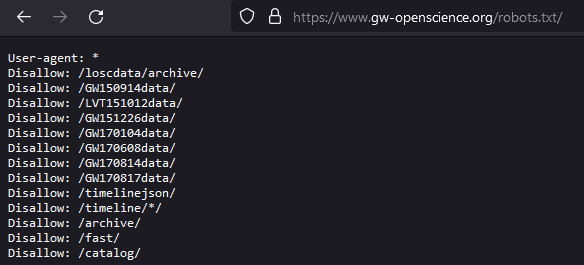

Por lo que vemos sólo hay restricciones a ciertas páginas, evitando acceder a ellas no incumpliremos sus restricciones y actuaremos de manera ética. Además hemos insertado en el código retardos de tiempo para evitar saturar el servidor con nuestra actividad. Para evitar saturar su web con consultas, nuestra idea es hacer una extracción de datos semanal, con los datos de la última semana cada vez. De este modo no saturaremos su servidor, además no se detectan ondas gravitacionales a diario, por lo que el intervalo semanal es lo mejor para todos.

## 7. Inspiración

Lo que nos ha hecho tomar la decisión de obtener este conjunto de datos es conocer más sobre las detecciones de ondas gravitacionales. Cada vez que el consorcio formado por LIGO, VIRGO y KAGRA publican una detección, ésta se convierte en un acontecimiento en medios y nos surgen muchas preguntas:

- ¿Qué intervalos de masas de objetos son los más detectados?

- ¿Hay periodos del año donde haya más probabilidad de detecciones? Si es así ¿De qué región del espacio provienen?

- ¿Qué hace que una señal se considere buena o se descarte?

- ¿Cuáles son las detecciones más cercanas? ¿Y las más lejanas?

Estos son ejemplos de preguntas a las que nos gustaría dar respuesta. Lo positivo es que los datos que necesitamos para ello están en partes de la web de acceso permitido, por lo tanto es viable obtenerlos.

## 8. Licencia